# Accidentes de tránsito en New York

En este caso práctico haremos la exploración de un data set aplicando algunas de las etapas de los procesos de ciencia de datos. Haremos transformación y limpiea de los datos. Entenderemos cómo extraer valor de los datos desde una perspectiva exploratoria

El caso estará estructurado así

- Explorar la estructura de los datos
- Hacer un análisis exploratorio y descriptivo de las principales variables
- Sacar conclusiones e hipótesis de análisis a partir de los hallazgos

## Lirerías utilizadas durante la clase

- [dplyr](https://github.com/tidyverse/dplyr): Una herramienta rápida y consistente para trabajar con marcos de datos como objetos, tanto en memoria como sin memoria.
- [ggplot2](https://github.com/tidyverse/ggplot2): Es un sistema para crear gráficos de forma declarativa, basado en The Grammar of Graphics.
- [reshape](https://github.com/cran/reshape2): Paquete de remodelación de datos.

In [1]:
library(dplyr)
library(ggplot2)
library(reshape)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename




In [2]:
# install.packages("repr")
library("repr")
options(repr.plot.width = 12, repr.plot.height=10)

**Contexto:** New York ha tenido un incremento en el número de accidentes de tránsito constante y se requiere analizar datos de estos accidentes del periodo Enero 2018 - Agosto 2019.

**Problema de negocio:** Identificar patrones en la data que permita tomar decisiones informadas dirigidas hacia la planeación de políticas públicas de caracter preventivo para diminuir el número y/o gravedad de los accidentes

Definimos nuestra ruta de trabajo, dónde tenemos guardados nuestros datos

In [3]:
setwd('/root/Documentos/UN/UN_2020_2/DCD/module_4/class_1/jupyter/data')
#setwd('C:/Users/Juliana/Desktop/Diplomado/D_2020/Casos/Casos/EDA') 

In [4]:
accidentes <- read.csv('accidents.csv',header=T,sep=';')
head(accidentes)

,DATE,TIME,BOROUGH,ZIP.CODE,LATITUDE,LONGITUDE,ON.STREET.NAME,NUMBER.OF.PEDESTRIANS.INJURED,NUMBER.OF.PEDESTRIANS.KILLED,NUMBER.OF.CYCLIST.INJURED,⋯,CONTRIBUTING.FACTOR.VEHICLE.2,CONTRIBUTING.FACTOR.VEHICLE.3,CONTRIBUTING.FACTOR.VEHICLE.4,CONTRIBUTING.FACTOR.VEHICLE.5,COLLISION_ID,VEHICLE.TYPE.CODE.1,VEHICLE.TYPE.CODE.2,VEHICLE.TYPE.CODE.3,VEHICLE.TYPE.CODE.4,VEHICLE.TYPE.CODE.5
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
1,09/26/2018,12:12,BRONX,10454,40.80899,-73.91132,,0,0,0,⋯,,,,,3988123,Sedan,,,,
2,09/25/2018,16:30,BROOKLYN,11236,40.63600,-73.91251,FLATLANDS AVENUE,1,0,0,⋯,,,,,3987962,Sedan,,,,
3,08/22/2019,19:30,QUEENS,11101,40.75549,-73.93953,,0,0,0,⋯,,,,,4193132,Sedan,,,,
4,09/23/2018,13:10,QUEENS,11367,NA,NA,MAIN STREET,0,0,1,⋯,Unspecified,,,,3985962,Bike,Station Wagon/Sport Utility Vehicle,,,
5,08/20/2019,22:40,BRONX,10468,40.86834,-73.90127,,0,0,0,⋯,Unspecified,,,,4192111,Sedan,Sedan,,,
6,08/20/2019,7:15,QUEENS,11354,NA,NA,,0,0,0,⋯,,,,,4191802,Sedan,,,,


Se tienen las variables

- **BOROUGH:** Vecindario donde ocurrió el accidente
- **COLLISION_ID:** ID del accidente
- **CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5):** Razones del accidente
- **CROSS STREET NAME:** La calle cruzada más cercana en la que pasó el accidente
- **DATE:** Fecha del accidente
- **TIME:** Hora del accidente
- **LATITUDE:** Latitud del accidente
- **LONGITUDE:** Longitud del accidente
- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED:** Número de heridos de cada tipo
- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED:** Número de muertos de cada tipo
- **ON STREET NAME:** Calle de accidente
- **VEHICLE TYPE CODE (1, 2, 3, 4, 5):** Tipo de vehículo involucrado en el accidente
- **ZIP CODE:** Código zip del accidente

In [5]:
print(nrow(accidentes))

[1] 238522


In [6]:
print(ncol(accidentes))

[1] 24


**¿Han incrementado el número de accidentes en el periodo de observación?**

Para hacer éste análisis primero debemos cambiar el formato de la columna de la fecha para manejarla apropiadamente.

In [7]:
accidentes$DATE <-as.Date(accidentes$DATE,'%m/%d/%Y')

Con esta transformación podemos extraer el mes de la fecha y hacer un análisis por meses. ¿Qué podemos concluir del número de accidentes por mes?

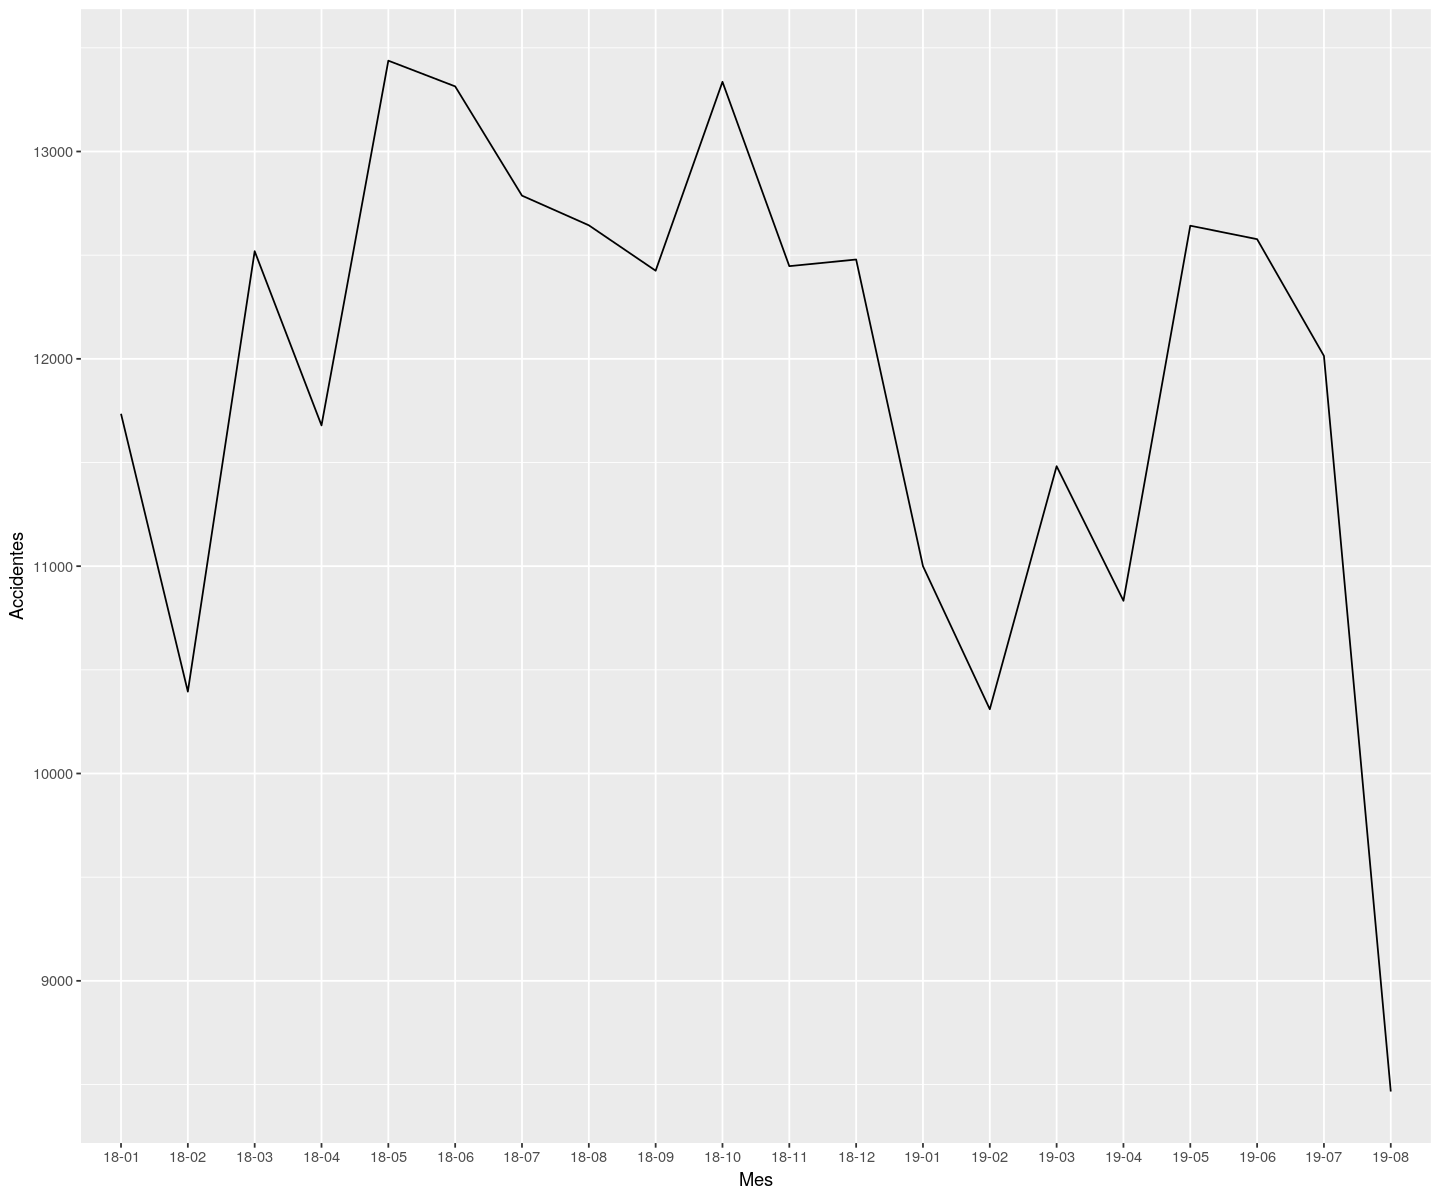

In [8]:
accidentes$m_y <- strftime(accidentes$DATE,'%y-%m')
accidentes_mes <- as.data.frame(accidentes %>% count(m_y))
ggplot(accidentes_mes, aes(x=m_y, y=n,group=1)) +
  geom_line()+xlab("Mes")+ylab("Accidentes")

**¿Existen patrones horarios en los accidentes?**

In [9]:
accidentes$TIME <-strptime(accidentes$TIME,'%H:%M')

Al igual que la fecha podemos transformar el formato de la hora y crear una variable que contenga únicamente la hora del accidente

In [10]:
accidentes$HORA <- strftime(accidentes$TIME,'%H')

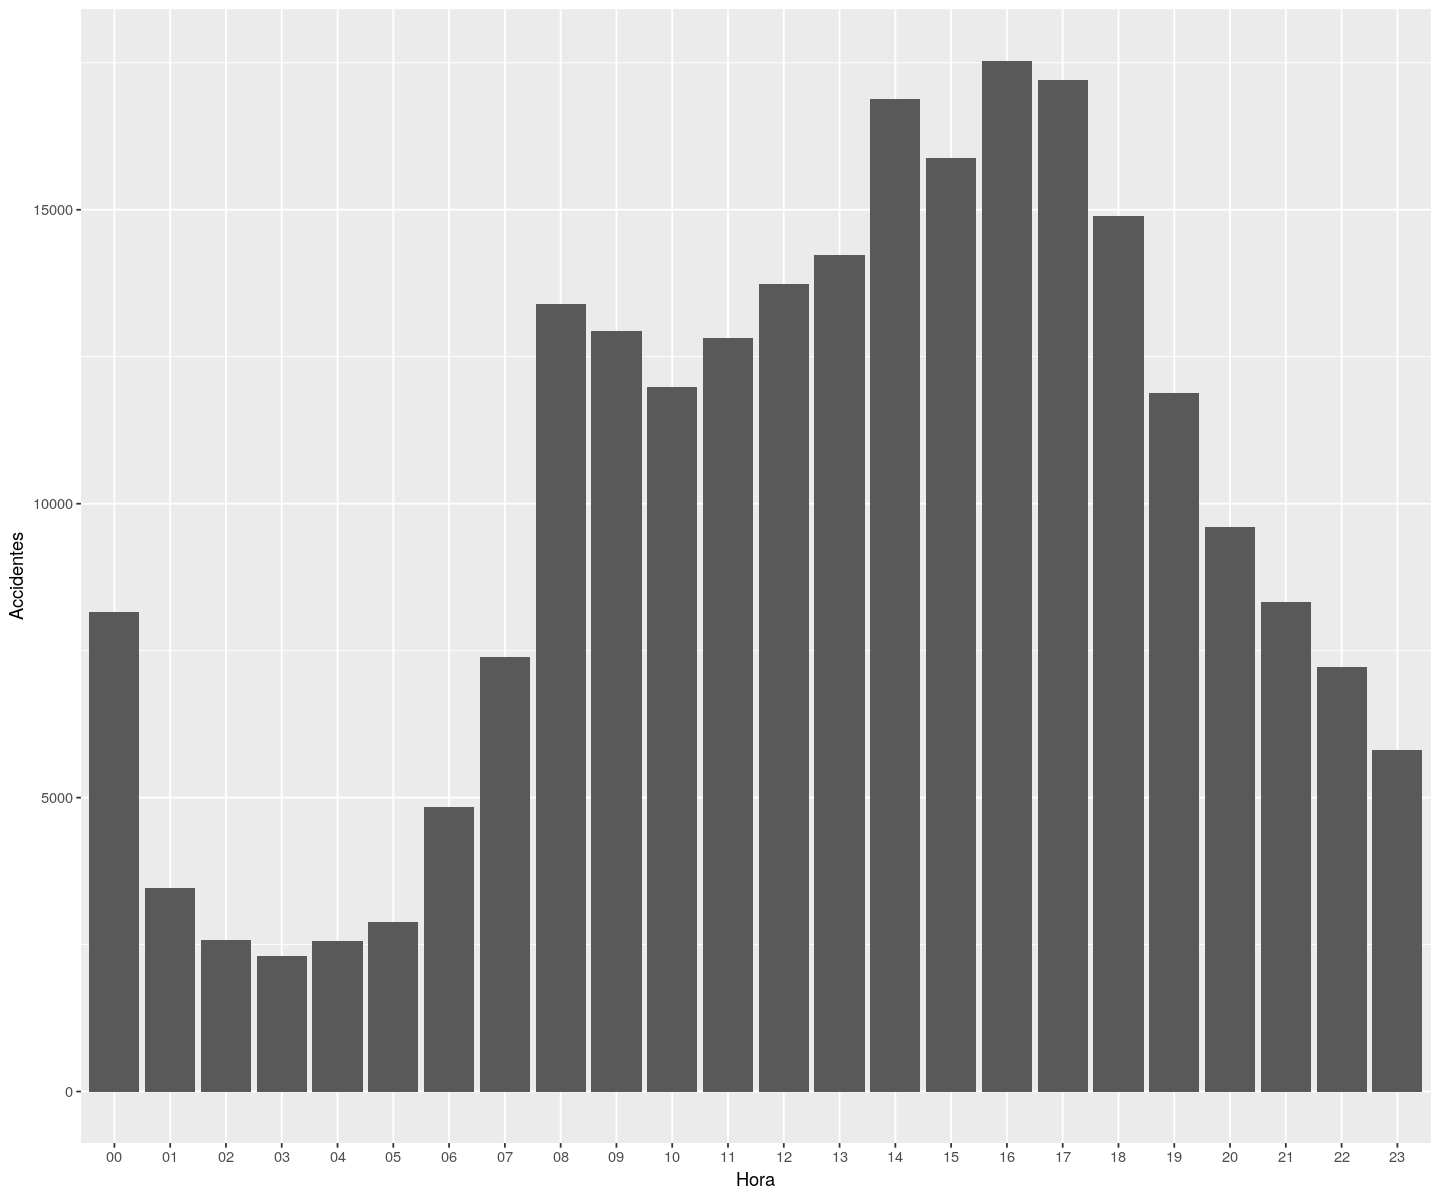

In [11]:
accidentes_hora <- as.data.frame(accidentes %>% count(HORA))
ggplot(accidentes_hora, aes(x=HORA, y=n,group=1)) +
  geom_bar(stat="identity")+xlab("Hora")+ylab("Accidentes")

**¿Existen patrones en los accidentes según el día de la semana?**

In [12]:
accidentes$dia <- weekdays(as.Date(accidentes$DATE,'%m/%d/%Y'))

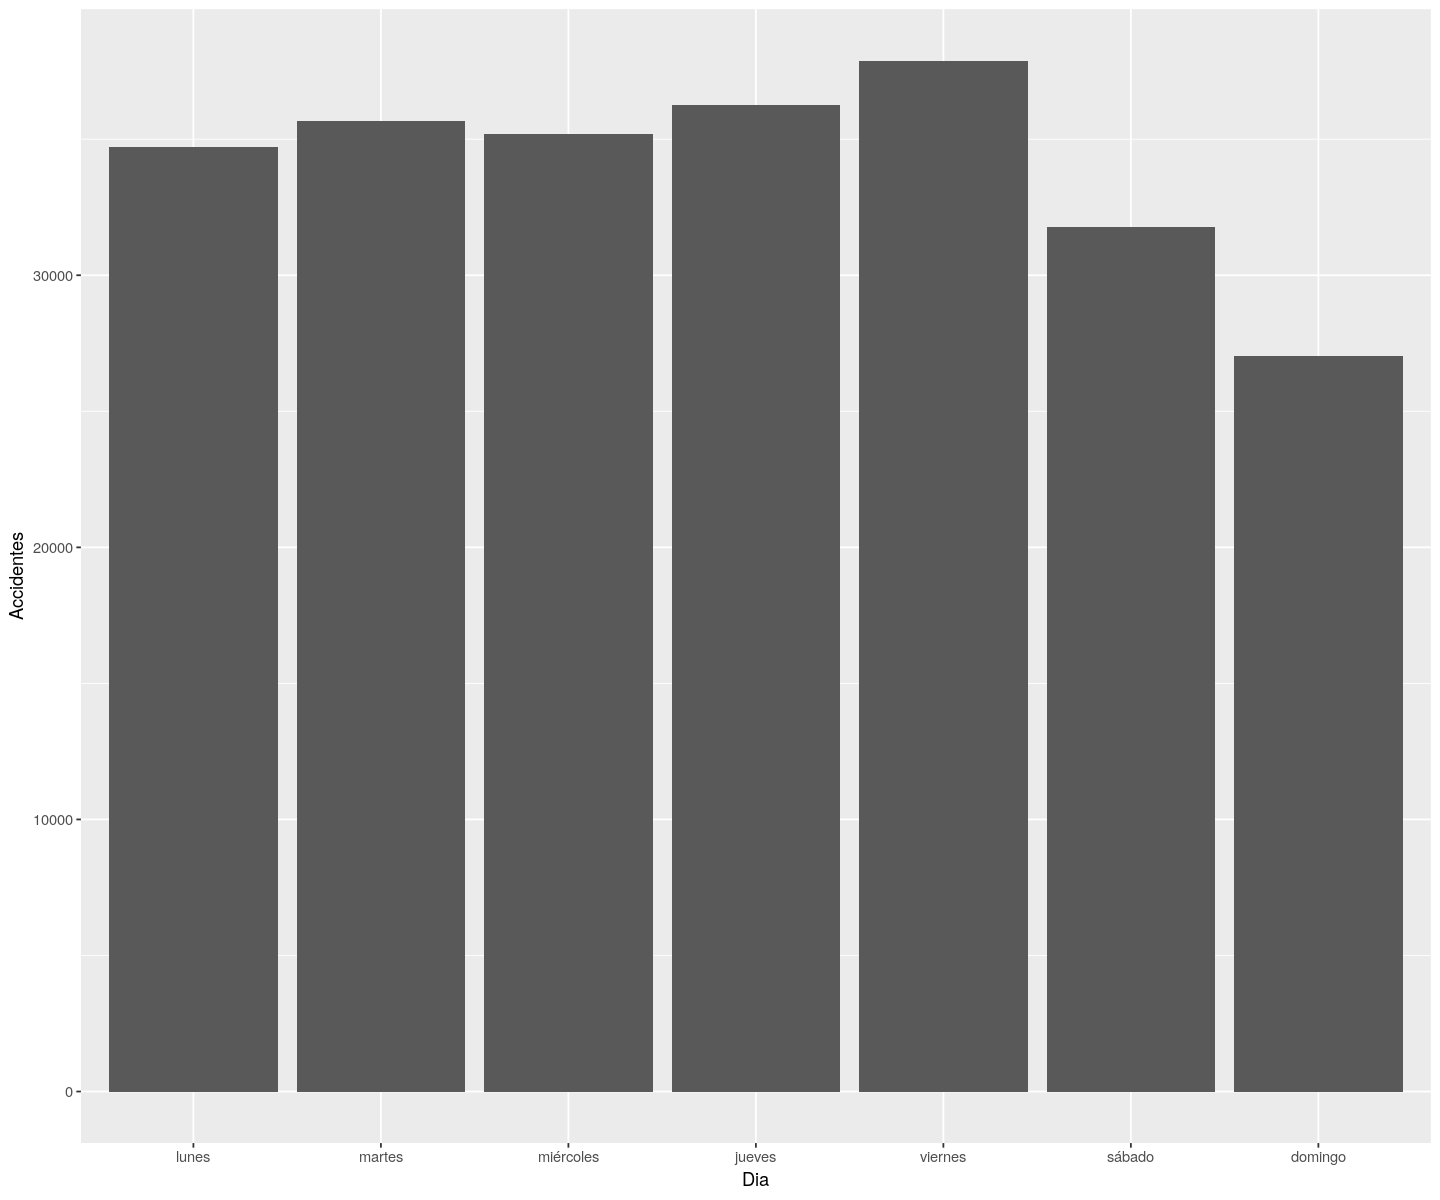

In [13]:
accidentes_dia <- as.data.frame(accidentes %>% count(dia))

# ggplot(accidentes_dia, aes(x=factor(dia,level=c('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')),
ggplot(accidentes_dia, aes(x=factor(dia,level=c('lunes','martes','miércoles','jueves','viernes','sábado','domingo')),
                           y=n,group=)) +
  geom_bar(stat="identity")+xlab("Dia")+ylab("Accidentes")

**¿Existen patrones accidentales por vecindario?**

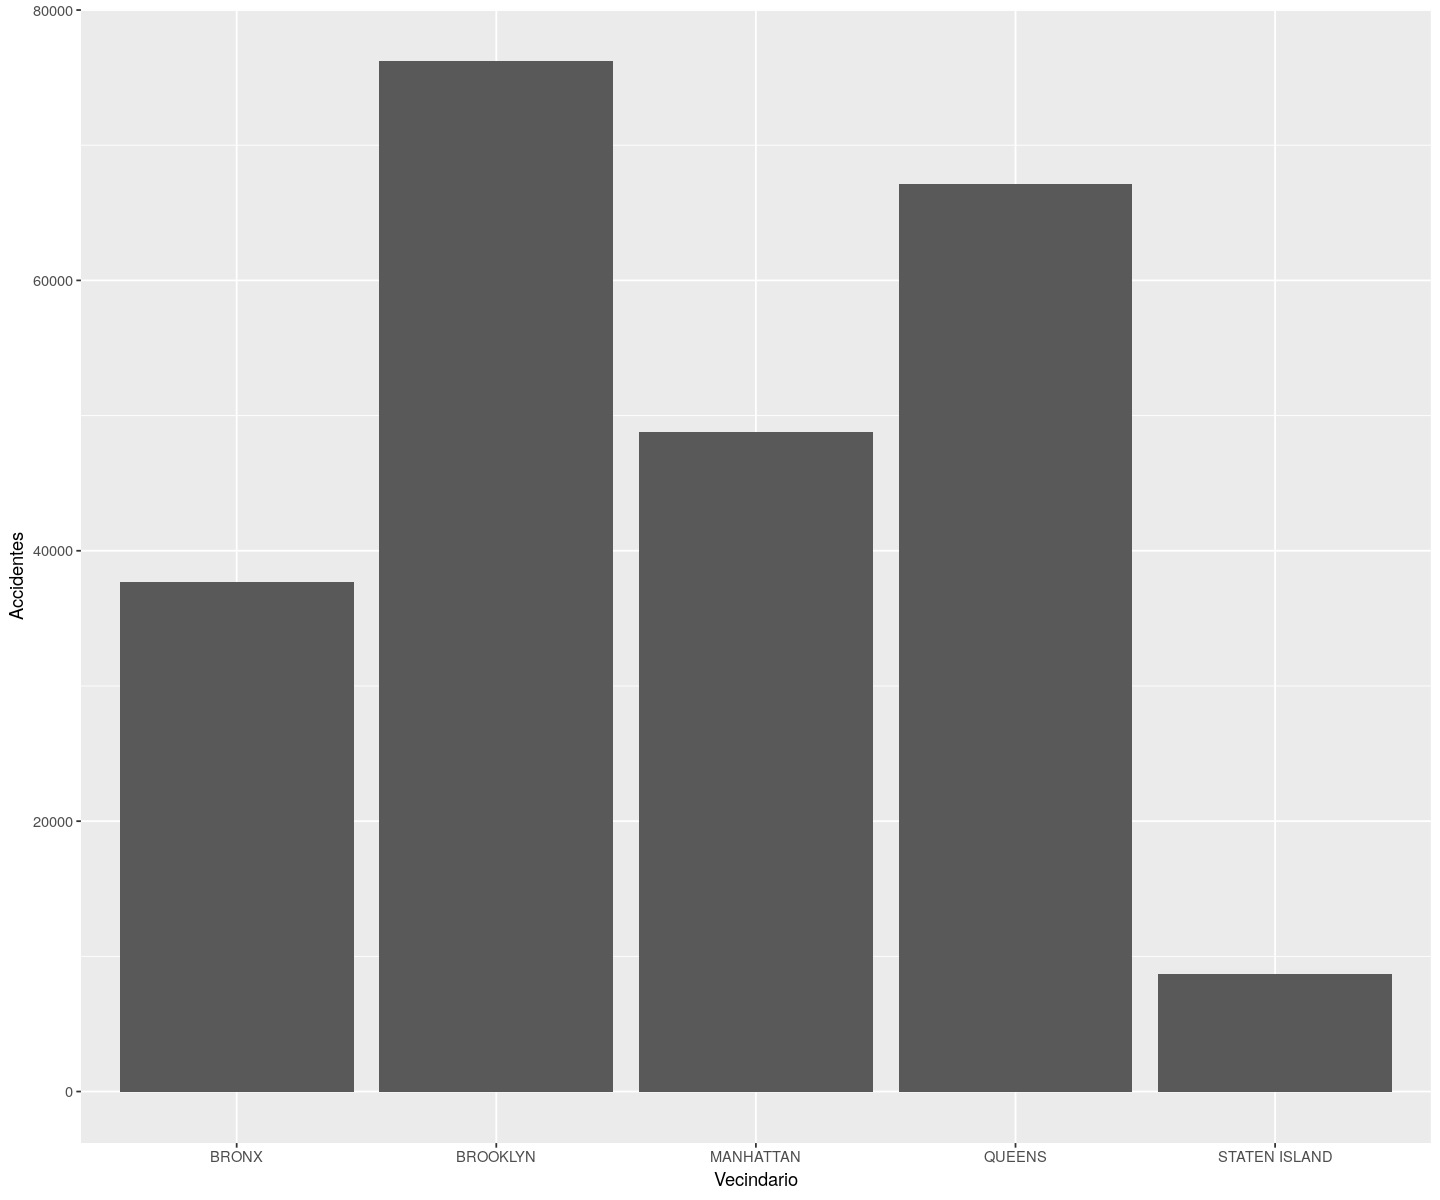

In [14]:
vec <- as.data.frame(accidentes %>% count(BOROUGH))
ggplot(vec, aes(x=BOROUGH,y=n,group=1)) +
  geom_bar(stat="identity")+xlab("Vecindario")+ylab("Accidentes")

**¿Por qué razón deberíamos estandarizxar estos conteos?**

Carguemos la información adicional de los vecindarios para poder analizarlos

In [15]:
borough_data <- read.csv('borough_data.csv',header=T)
borough_data

borough,population,area
<fct>,<int>,<dbl>
the bronx,1471160,42.10
brooklyn,2648771,70.82
manhattan,1664727,22.83
queens,2358582,108.53
staten island,479458,58.37


Para hacer los conteos de accidentes comparables podemos relativizar utilizando el área de los vecindarios. Para esto primero debemos asociar las dos tablas de información

El único vecindario que no haría match sería ‘the bronx’ con ‘BRONX’. Adicionalmente, necesitamos transformar los valores en el df a minúsculas(mayúsculas) para poder calcular los conteos de accidentes relativos al área del vecindario

In [16]:
borough_data$borough <- as.character(toupper(borough_data$borough))
borough_data$borough[borough_data$borough =='THE BRONX'] <- 'BRONX'

In [17]:
borough_frame = merge(vec,borough_data,by.x='BOROUGH',by.y='borough')
borough_frame$accidentes_por_area = borough_frame$n/borough_frame$area

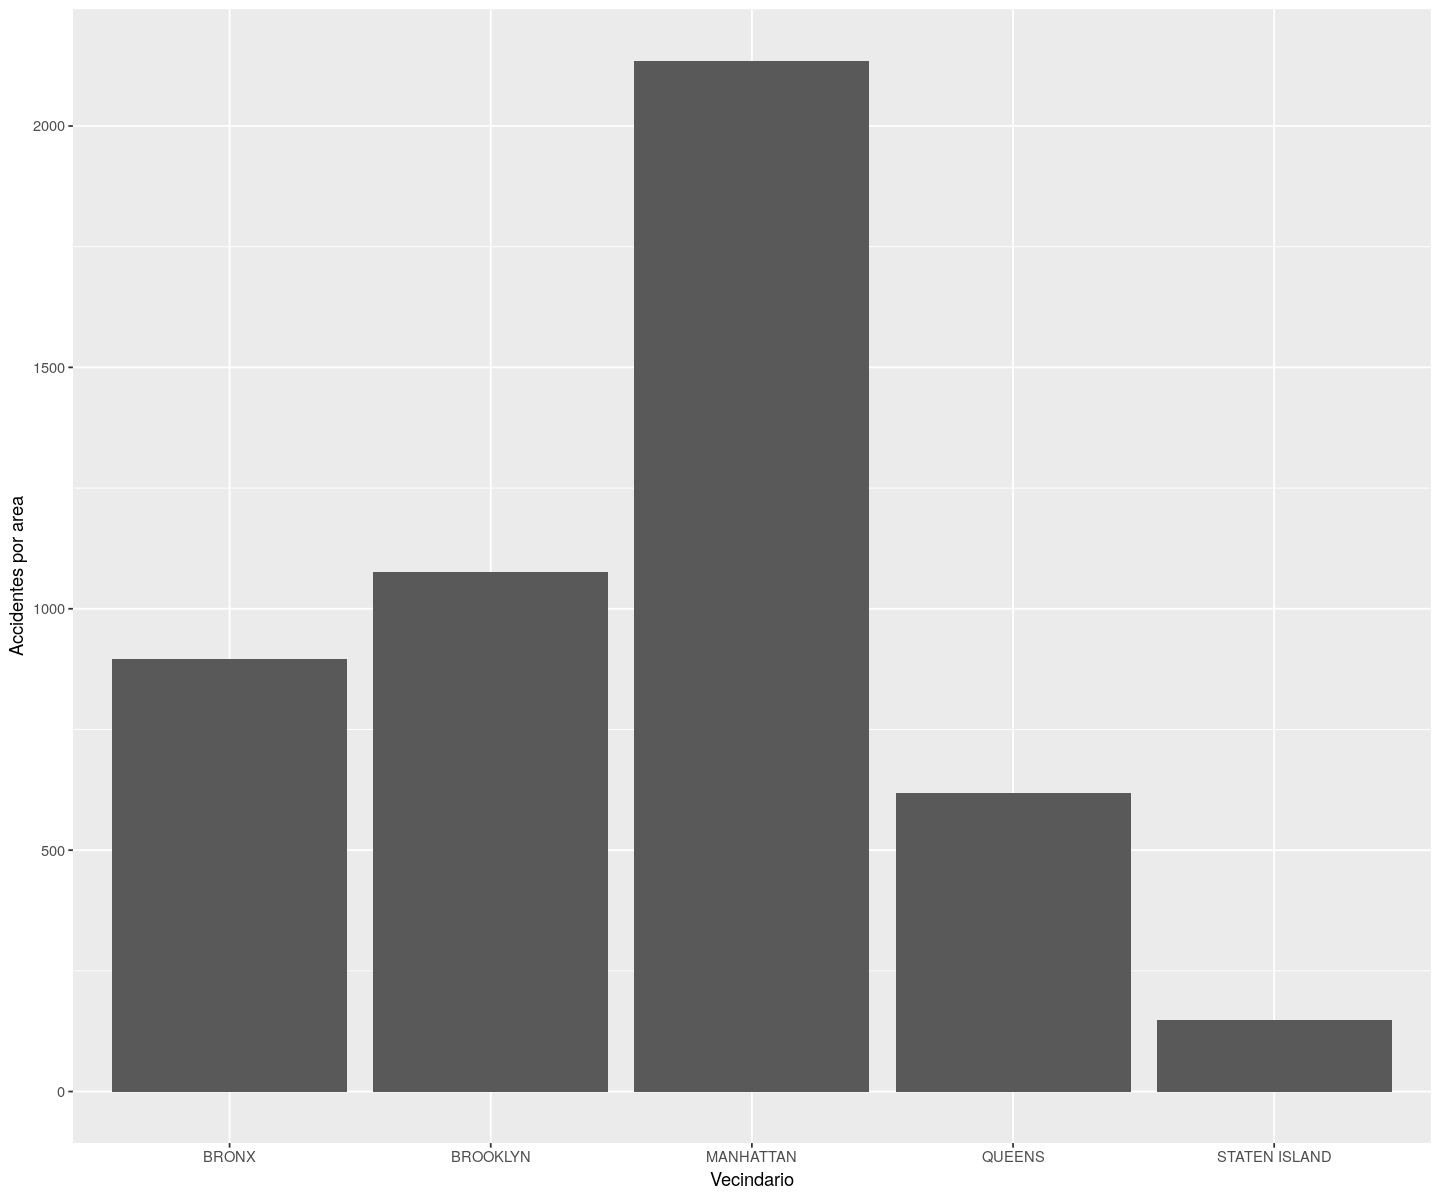

In [18]:
ggplot(borough_frame, aes(x=BOROUGH,y=accidentes_por_area,group=1)) +
  geom_bar(stat="identity")+xlab("Vecindario")+ylab("Accidentes por area")

**Ampliemos el análisis de manera bivariada**

¿Existen patrones horarios en la accidentalidad por vecindario?

In [19]:
accidentes_hora_borough <- as.data.frame(accidentes %>% count(BOROUGH,HORA))

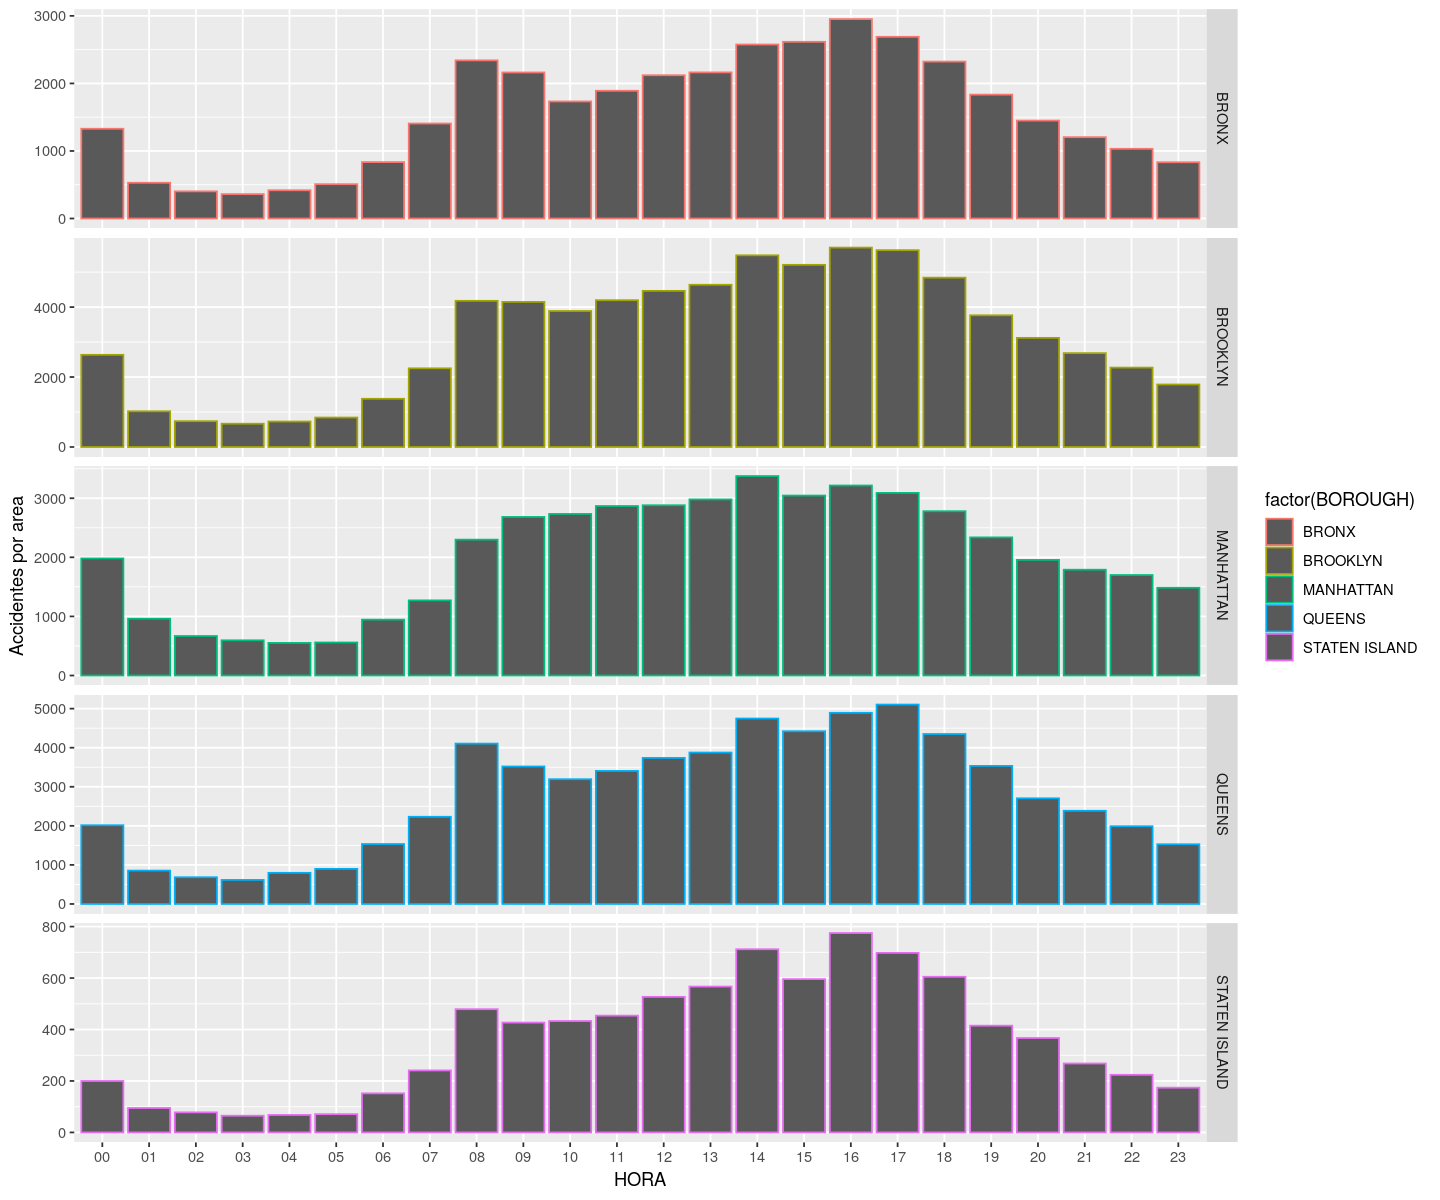

In [20]:
p <- ggplot(accidentes_hora_borough, aes(HORA, n, colour = factor(BOROUGH))) +
  geom_bar(stat="identity")+ylab("Accidentes por area")

p + facet_grid(vars(BOROUGH), scales = "free")

**¿Cuáles son las causas más comunes de los accidentes?**

Debemos tener en cuenta las 5 columnas de CONTRIBUTING FACTOR para hacer este análisis

In [21]:
# Factores uno debajo del otro
factors_df <- melt(accidentes[,c('CONTRIBUTING.FACTOR.VEHICLE.1','CONTRIBUTING.FACTOR.VEHICLE.2','CONTRIBUTING.FACTOR.VEHICLE.3',
                                 'CONTRIBUTING.FACTOR.VEHICLE.4','CONTRIBUTING.FACTOR.VEHICLE.5','COLLISION_ID')],
                   id='COLLISION_ID')
factors_df <- factors_df[factors_df$value !='',]

In [22]:
no_rep_factors <- as.data.frame(factors_df %>% count(COLLISION_ID,value))

In [23]:
final_df <- as.data.frame(no_rep_factors %>% count(value))
head(final_df[order(-final_df$n),])

,value,n
,<fct>,<int>
51,Unspecified,190096
9,Driver Inattention/Distraction,61752
15,Failure to Yield Right-of-Way,19641
18,Following Too Closely,17293
5,Backing Unsafely,14835
33,Passing Too Closely,12631


Y **¿cuáles son los tipos de vehículos involucrados en mas accidentes?**

In [24]:
vehicle_df <- melt(accidentes[,c('VEHICLE.TYPE.CODE.1','VEHICLE.TYPE.CODE.2','VEHICLE.TYPE.CODE.3',
                                 'VEHICLE.TYPE.CODE.4','VEHICLE.TYPE.CODE.5','COLLISION_ID')],
                   id='COLLISION_ID')
vehicle_df <- vehicle_df[vehicle_df$value !='',]

no_rep_vehicle <- as.data.frame(vehicle_df %>% count(COLLISION_ID,value))


final_dfv <- as.data.frame(no_rep_vehicle %>% count(value))
head(final_dfv[order(-final_dfv$n),])

,value,n
,<fct>,<int>
326,Sedan,119714
353,Station Wagon/Sport Utility Vehicle,99146
275,PASSENGER VEHICLE,31228
345,SPORT UTILITY / STATION WAGON,25059
366,Taxi,14584
281,Pick-up Truck,10864


**¿Pueden existir patrones de factores o vehículos diferencial para vecindarios?**

Por factores y vecindarios

In [25]:
factors_df <- melt(accidentes[,c('CONTRIBUTING.FACTOR.VEHICLE.1','CONTRIBUTING.FACTOR.VEHICLE.2','CONTRIBUTING.FACTOR.VEHICLE.3',
                                 'CONTRIBUTING.FACTOR.VEHICLE.4','CONTRIBUTING.FACTOR.VEHICLE.5','COLLISION_ID','BOROUGH')],
                   id=c('COLLISION_ID','BOROUGH'))

factors_df <- factors_df[factors_df$value !='',]

no_rep_factors <- as.data.frame(factors_df %>% count(COLLISION_ID,BOROUGH,value))


final_df <- as.data.frame(no_rep_factors %>% count(BOROUGH,value))

head(final_df[order(-final_df$n),])

,BOROUGH,value,n
,<fct>,<fct>,<int>
105,BROOKLYN,Unspecified,63448
214,QUEENS,Unspecified,54884
160,MANHATTAN,Unspecified,35375
51,BRONX,Unspecified,29342
172,QUEENS,Driver Inattention/Distraction,19517
64,BROOKLYN,Driver Inattention/Distraction,17997


Por vehículo y vecindarios

In [ ]:
vehicle_df <- melt(accidentes[,c('VEHICLE.TYPE.CODE.1','VEHICLE.TYPE.CODE.2','VEHICLE.TYPE.CODE.3',
                                 'VEHICLE.TYPE.CODE.4','VEHICLE.TYPE.CODE.5','COLLISION_ID','BOROUGH')],
                   id=c('COLLISION_ID','BOROUGH'))
vehicle_df <- vehicle_df[vehicle_df$value !='',]

no_rep_vehicle <- as.data.frame(vehicle_df %>% count(COLLISION_ID,BOROUGH,value))


final_dfv <- as.data.frame(no_rep_vehicle %>% count(BOROUGH,value))
head(final_dfv[order(-final_dfv$n),])

## Ejercicios

**1. ¿Qué podemos decir sobre el número de personas heridas y muertes en los accidentes? Exploremos el comportamiento del total de heridos y total de muertes en todos los accidentes. (Crear una nueva columna que sume todos los herido y otra que sume todas las muertes)**

**2. Exploremos las muertes y heridas por peatón, ciclista y motociclista. Existen diferencias en estos? En qué casos mueren más personas durante los accidentes? En qué casos resultan más heridos?**

**3. ¿ Existen patrones en las muertes y heridos en accidentes por vecindario? En cuál vecindario se presentaron más muertes? En cuál menos?**

**4. A partir de los análisis anteriores, qué recomendaciones sobre la planeación de políticas preventivas frente a la accidentalidad se podrían hacer para reducir los accidentes y su gravedad?**

**5. ¿Qué otras variables o análisis exploratorios podríamos hacer para complementar este análisis?**

**6. ¿Cuáles podrían ser los siguientes pasos para el análisis de este problema en búsqueda de soluciones?**

## Conclusiones

- La exploración y descripción inicial de los datos es una gran herramienta para encontrar patrones de interés del problema
- Encontramos patrones en los datos que ayudan a generar hipótesis sobre el comportamiento de los accidentes
- Resultan ser relevantes factores cómo el día de la semana, hora y vecindario para analizar el comportamiento de la accidentalidad
- Esta descripción puede ser una guía importante para definir pasos siguientes en un análisis con mayor profundidad